In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [132]:
data = pd.read_csv('acceleration_data_in_bilbao_SP.csv')

In [114]:
data

,time,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,vehicle_make,vehicle_model,vehicle_type,road_type
0,2022-09-29 03:46:06.458,-0.030,-0.028,1.009,0.0,43.238934,-2.877811,318.000000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
1,2022-09-29 03:46:06.558,-0.032,-0.029,1.008,0.0,43.238934,-2.877811,318.000000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
2,2022-09-29 03:46:06.658,-0.029,-0.027,1.008,0.0,43.238934,-2.877811,318.000000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
3,2022-09-29 03:46:06.758,-0.028,-0.029,1.009,0.0,43.238934,-2.877811,318.000000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
4,2022-09-29 03:46:06.858,-0.030,-0.029,1.015,0.0,43.238934,-2.877811,318.000000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262438,2022-09-29 16:01:47.128,-0.015,-0.108,0.986,67.6,43.214165,-2.884899,24.640694,80,MAN,TGX,truck,SECONDARY_ROAD
262439,2022-09-29 16:01:47.228,-0.011,-0.057,1.005,67.6,43.214180,-2.884889,25.098776,80,MAN,TGX,truck,SECONDARY_ROAD
262440,2022-09-29 16:01:47.328,0.001,-0.068,0.991,67.6,43.214195,-2.884879,25.340712,80,MAN,TGX,truck,SECONDARY_ROAD
262441,2022-09-29 16:01:47.428,-0.027,-0.097,0.985,67.6,43.214210,-2.884869,25.629484,80,MAN,TGX,truck,SECONDARY_ROAD


In [5]:
data.columns

Index(['time', 'acc_x', 'acc_y', 'acc_z', 'speed', 'latitude', 'longitude',
       'heading', 'road_speed_limit', 'vehicle_make', 'vehicle_model',
       'vehicle_type', 'road_type'],
      dtype='object')

In [6]:
data['road_type'].unique()

array(['LOCAL_ROAD_OF_MAJOR_IMPORTANCE', 'CONNECTING_ROAD', 'MAJOR_ROAD',
       'SECONDARY_ROAD', 'MOTORWAY', 'MAJOR_ROAD_OF_HIGH_IMPORTANCE',
       'DESTINATION_ROAD'], dtype=object)

In [7]:
data['vehicle_type'].unique()

array(['truck'], dtype=object)

In [8]:
data['vehicle_model'].unique()

array(['TGX'], dtype=object)

In [9]:
data['vehicle_make'].unique()

array(['MAN'], dtype=object)

In [133]:
data['time'] = pd.to_datetime(data['time'])

In [11]:
data.index.values

array([     0,      1,      2, ..., 262440, 262441, 262442])

(array([4.00000e+00, 9.00000e+00, 2.01000e+02, 9.89800e+03, 2.39985e+05,
        1.20250e+04, 2.94000e+02, 2.20000e+01, 4.00000e+00, 1.00000e+00]),
 array([0.144 , 0.3365, 0.529 , 0.7215, 0.914 , 1.1065, 1.299 , 1.4915,
        1.684 , 1.8765, 2.069 ]),
 <BarContainer object of 10 artists>)

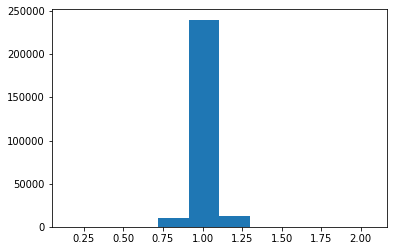

In [32]:
plt.hist(data['acc_z'])

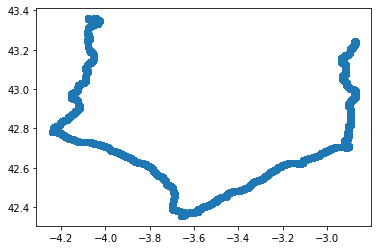

In [12]:
plt.scatter(data['longitude'], data['latitude'])
plt.show()

In [13]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


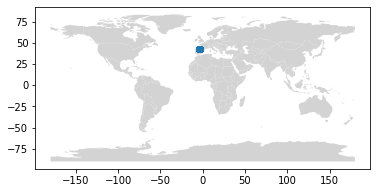

In [14]:
countries.plot(color="lightgrey")
plt.scatter(data['longitude'], data['latitude'])

-2.878213383767833 43.23903815 Aparcamiento Disuasorio Euskotren, Avenida Cervantes, Polígono Industrial Azbarren, Arizgoiti, Basauri, Bizkaia, Euskadi, 48450, España


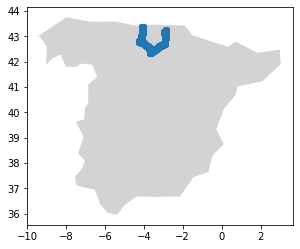

In [15]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")
location = geolocator.reverse([data['latitude'][0], data['longitude'][0]], timeout = 10, exactly_one=True)

print(location.longitude,location.latitude,location.address)

countries[countries["name"] == "Spain"].plot(color="lightgrey")
plt.scatter(data['longitude'], data['latitude'])

## Testing  on a sub-sample from the dataset

In [134]:
mask = (data['time'].dt.hour==3)&(data['time'].dt.minute < 50)
sub = data[mask]

In [135]:
sub

,time,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,vehicle_make,vehicle_model,vehicle_type,road_type
0,2022-09-29 03:46:06.458,-0.030,-0.028,1.009,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
1,2022-09-29 03:46:06.558,-0.032,-0.029,1.008,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
2,2022-09-29 03:46:06.658,-0.029,-0.027,1.008,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
3,2022-09-29 03:46:06.758,-0.028,-0.029,1.009,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
4,2022-09-29 03:46:06.858,-0.030,-0.029,1.015,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2022-09-29 03:49:39.578,-0.133,-0.220,1.010,19.1,43.238370,-2.872228,174.25743,50,MAN,TGX,truck,MAJOR_ROAD
1175,2022-09-29 03:49:39.678,-0.106,-0.171,1.011,19.1,43.238360,-2.872228,175.35898,50,MAN,TGX,truck,MAJOR_ROAD
1176,2022-09-29 03:49:39.778,-0.132,-0.209,1.040,19.1,43.238358,-2.872227,176.21948,50,MAN,TGX,truck,MAJOR_ROAD
1177,2022-09-29 03:49:39.878,-0.105,-0.183,1.026,19.1,43.238354,-2.872227,177.27542,50,MAN,TGX,truck,MAJOR_ROAD


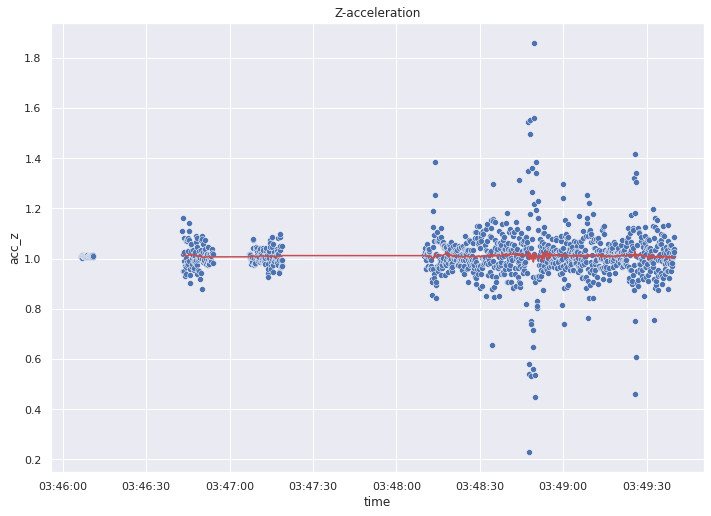

In [120]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='time',y='acc_z',data=sub).set_title('Z-acceleration')
sns.lineplot(x='time',y='acc_z_mean',data=sub,color='r')

plt.savefig('acc_z.png')

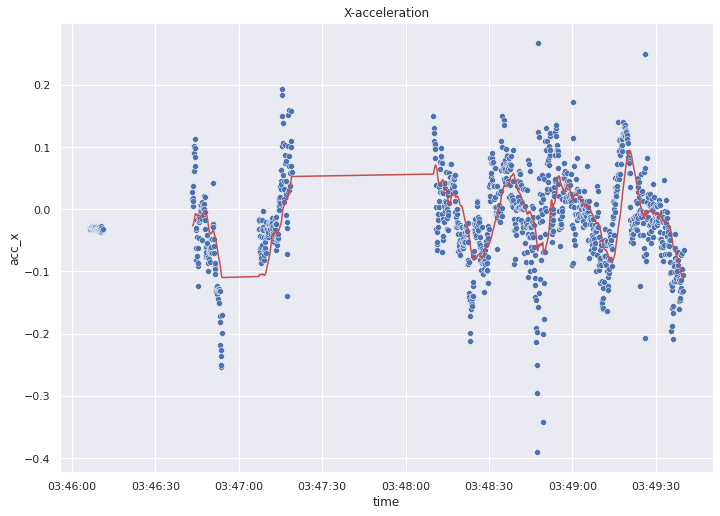

In [123]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#
sns.scatterplot(x='time',y='acc_x',data=sub).set_title('X-acceleration')
sns.lineplot(x='time',y='acc_x_mean',data=sub,color='r')
plt.savefig('acc_x.png')

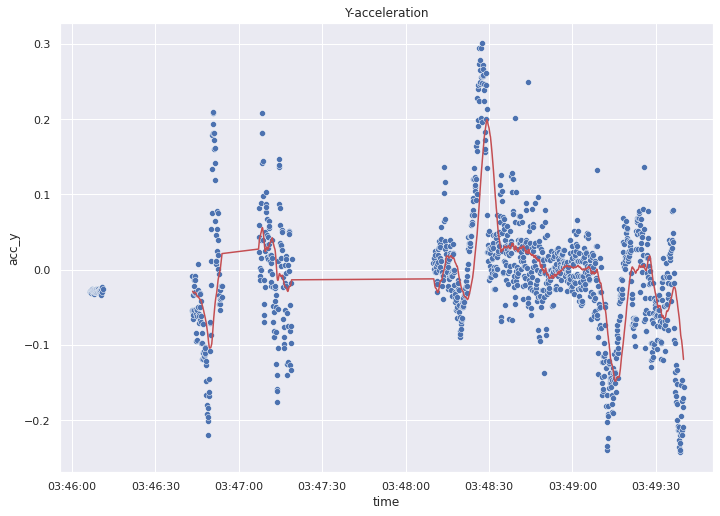

In [124]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='time',y='acc_y',data=sub).set_title('Y-acceleration')
sns.lineplot(x='time',y='acc_y_mean',data=sub,color='r')
plt.savefig('acc_y.png')

# Metrics:
### Datapoints are 100 ms apart, so we average all numerical variables over 5 seconds (50 datapoints):

In [136]:
sub = sub.set_index('time')

### eliminating categorical variables

In [137]:
for f in sub.columns:
    if sub[f].dtypes=='float64' or sub[f].dtypes=='int64':

      print(f+'_mean',sub[f].dtypes)

acc_x_mean float64
acc_y_mean float64
acc_z_mean float64
speed_mean float64
latitude_mean float64
longitude_mean float64
heading_mean float64
road_speed_limit_mean int64


In [138]:
rolling_window = 50
fields = sub.columns
fields_agg = fields
for field in fields:
    if sub[field].dtypes=='float64' or sub[field].dtypes=='int64':
     sub[field+'_mean'] = sub[field].rolling(window=rolling_window).mean()

In [22]:
sub

,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,vehicle_make,vehicle_model,vehicle_type,road_type,acc_x_mean,acc_y_mean,acc_z_mean,speed_mean,latitude_mean,longitude_mean,heading_mean,road_speed_limit_mean
time,,,,,,,,,,,,,,,,,,,,
2022-09-29 03:46:06.458,-0.030,-0.028,1.009,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-29 03:46:06.558,-0.032,-0.029,1.008,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-29 03:46:06.658,-0.029,-0.027,1.008,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-29 03:46:06.758,-0.028,-0.029,1.009,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-29 03:46:06.858,-0.030,-0.029,1.015,0.0,43.238934,-2.877811,318.00000,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29 03:49:39.578,-0.133,-0.220,1.010,19.1,43.238370,-2.872228,174.25743,50,MAN,TGX,truck,MAJOR_ROAD,-0.1100,-0.2009,1.0042,19.82,43.238388,-2.872232,170.088132,50.0
2022-09-29 03:49:39.678,-0.106,-0.171,1.011,19.1,43.238360,-2.872228,175.35898,50,MAN,TGX,truck,MAJOR_ROAD,-0.1074,-0.1940,1.0055,19.64,43.238383,-2.872231,171.071827,50.0
2022-09-29 03:49:39.778,-0.132,-0.209,1.040,19.1,43.238358,-2.872227,176.21948,50,MAN,TGX,truck,MAJOR_ROAD,-0.1063,-0.1919,1.0040,19.46,43.238379,-2.872230,172.027744,50.0


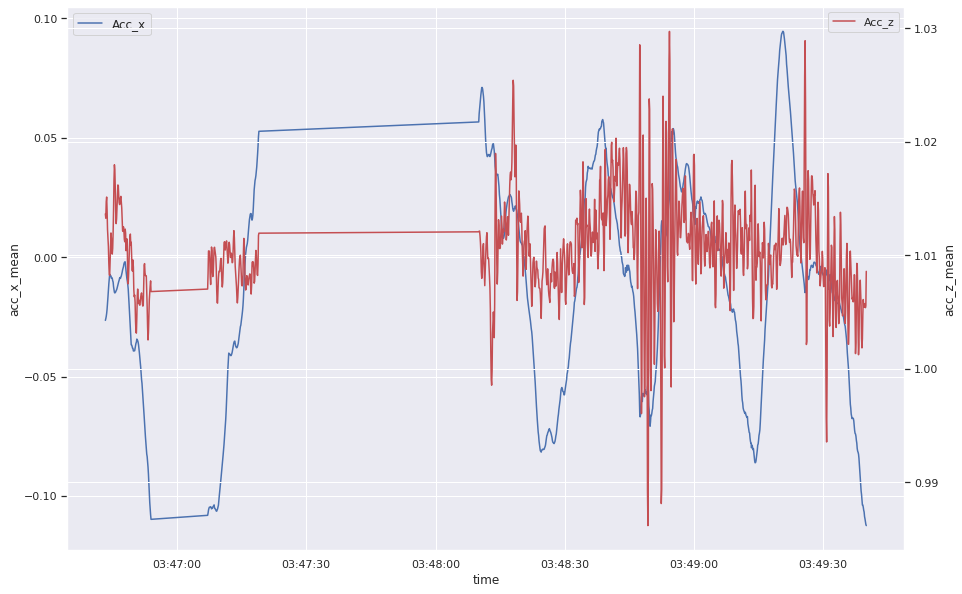

In [139]:
sns.set(rc={'figure.figsize':(15,10)})
#sns.scatterplot(x='time',y='acc_x',data=sub).set_title('X-acceleration')
ax = sns.lineplot(x='time',y='acc_x_mean',data=sub,label='Acc_x')
#ax = sns.lineplot(x='time',y='acc_y_mean',data=sub,label= ' Acc_y')
ax2 = ax.twinx()
sns.lineplot(x='time',y='acc_z_mean',data=sub,ax=ax2,color='r',label='Acc_z')
ax.legend(loc='upper left',fontsize=12)
#ax2.legend(loc='upper right',fontsize=12)

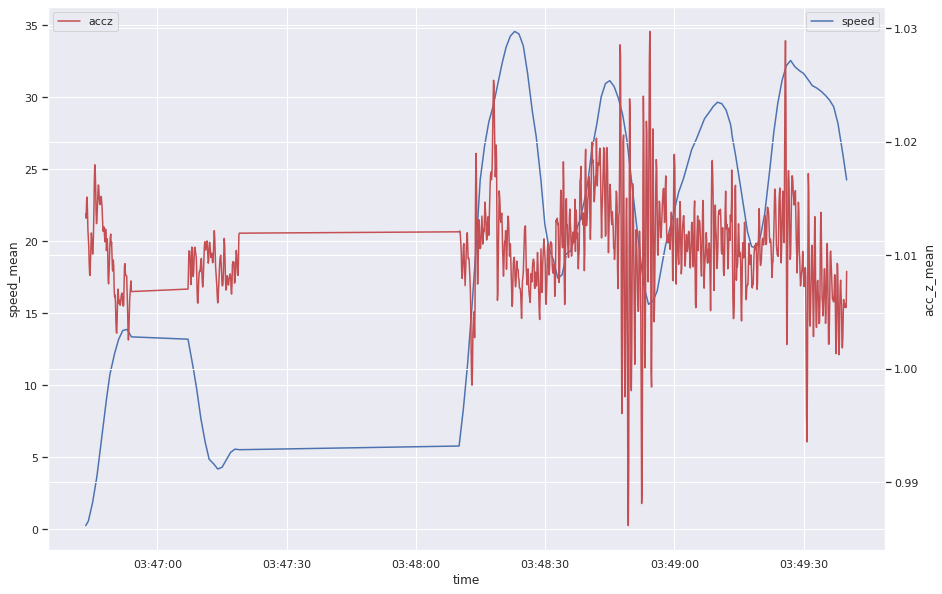

In [140]:
ax = sns.lineplot(x='time',y='speed_mean',data=sub,label='speed')
ax2 = ax.twinx()
sns.lineplot(x='time',y='acc_z_mean',data=sub,ax=ax2,color='r',label='accz')
ax.legend()
ax2.legend(loc='upper left')

# Potholes and speedbumbs will show a vriation in the Z-acceleration. 
Pothole: Z-acceleration will decrease and then increase: local minima <br />
Speedbump:Z-acceleration will increase and then decrease: local maxima

In [141]:
# locating local minimas and maximas
from scipy.signal import find_peaks


In [142]:
minimas,_= find_peaks(sub['acc_z_mean'])
maximas,_ = find_peaks(-sub['acc_z_mean'])


In [145]:
minimas

array([  52,   62,   70,   78,   85,   91,   95,   99,  107,  109,  113,
        117,  124,  127,  133,  140,  154,  158,  165,  172,  183,  187,
        195,  200,  206,  211,  217,  232,  240,  247,  254,  260,  262,
        268,  277,  287,  295,  298,  310,  315,  322,  329,  333,  336,
        343,  350,  356,  362,  369,  375,  384,  390,  395,  404,  410,
        430,  436,  443,  448,  453,  458,  466,  473,  482,  489,  497,
        501,  504,  506,  512,  518,  525,  527,  533,  540,  545,  549,
        552,  560,  564,  566,  571,  579,  586,  588,  594,  596,  600,
        604,  613,  620,  627,  633,  642,  651,  659,  666,  673,  680,
        688,  696,  705,  712,  720,  727,  735,  742,  752,  757,  761,
        764,  770,  777,  784,  790,  799,  805,  810,  818,  824,  831,
        835,  843,  851,  856,  858,  865,  872,  880,  884,  889,  896,
        899,  904,  907,  911,  920,  923,  927,  931,  937,  941,  951,
        956,  960,  965,  968,  975,  983,  989,  9

In [146]:
maximas

array([  50,   59,   65,   74,   82,   90,   94,   97,  102,  108,  112,
        116,  121,  126,  129,  136,  148,  155,  163,  168,  179,  184,
        190,  197,  203,  209,  213,  225,  236,  244,  250,  257,  261,
        264,  272,  283,  290,  297,  306,  312,  319,  325,  331,  334,
        340,  345,  351,  360,  365,  373,  379,  386,  393,  399,  407,
        421,  434,  441,  445,  452,  455,  463,  468,  478,  485,  495,
        498,  502,  505,  508,  516,  521,  526,  530,  537,  542,  547,
        551,  554,  563,  565,  568,  573,  582,  587,  591,  595,  598,
        601,  608,  617,  624,  632,  638,  646,  655,  662,  670,  677,
        685,  693,  701,  709,  716,  724,  730,  739,  746,  754,  760,
        762,  767,  774,  781,  787,  793,  802,  807,  814,  821,  827,
        832,  840,  846,  854,  857,  861,  869,  876,  881,  887,  892,
        898,  901,  906,  908,  915,  922,  924,  929,  934,  939,  945,
        954,  959,  961,  966,  970,  978,  985,  9

## Here an anomaly threshold should be defined to exclude irrelevant minimas and maximas

In [143]:
p =sub['acc_z_mean'][minimas]
s =sub['acc_z_mean'][maximas]

In [100]:
'''
threshold = 1.012
p = np.array(p)[np.where(p>threshold)]
s = np.array(s)[np.where(s>threshold)]
'''

In [108]:
import mpld3
#mpld3.enable_notebook()
mpld3.disable_notebook()

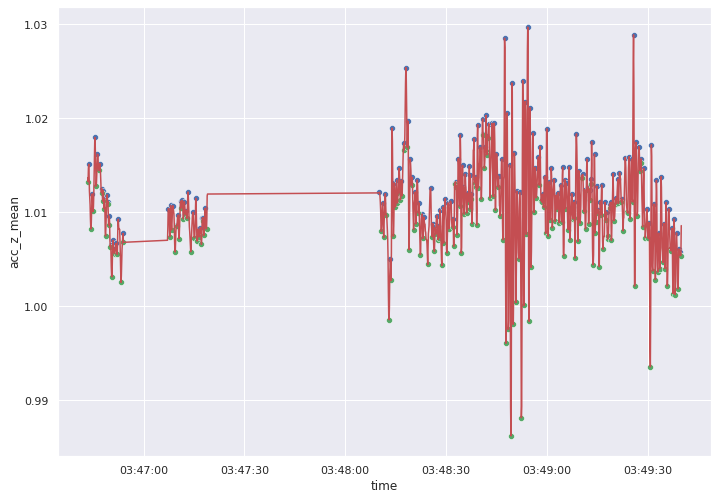

In [144]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.scatterplot(x='time',y='acc_z',data=sub).set_title('X-acceleration')
sns.lineplot(x='time',y='acc_z_mean',data=sub,color='r')
sns.scatterplot(x='time',y=p,data=sub,color='b')
sns.scatterplot(x='time',y=s,data=sub,color='g')
plt.savefig('maximas_minimas.png')

## Creating a new entry in the data with labels 0 for potholes and 1 for speedbumbs, 2 for normal road

In [148]:
sub['label'] = 2

In [149]:
step = 25 #the number of data points around the maxima or minima to assign the same label to
for mini in minimas:
  cont = np.arange(mini-step,mini+step,1)
  cont = [c for c in cont if c < len(sub)]
  sub['label'][cont] = 0

for maxi in maximas:
 cont2 = np.arange(maxi-step,maxi+step,1)
 cont2 = [c for c in cont2 if c < len(sub)]
 sub['label'][cont2]= 1

/tmp/ipykernel_326707/2606259862.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['label'][cont] = 0
/tmp/ipykernel_326707/2606259862.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['label'][cont2]= 1


In [151]:
sub['label'][maximas]

time
2022-09-29 03:46:43.458    1
2022-09-29 03:46:44.358    1
2022-09-29 03:46:44.958    1
2022-09-29 03:46:45.858    1
2022-09-29 03:46:46.658    1
                          ..
2022-09-29 03:49:37.478    1
2022-09-29 03:49:38.178    1
2022-09-29 03:49:38.978    1
2022-09-29 03:49:39.578    1
2022-09-29 03:49:39.778    1
Name: label, Length: 179, dtype: int64